In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal.windows import blackman

In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.nn import Module
from torch.nn import Conv1d
from torch.nn import Linear
from torch.nn import MaxPool1d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

import matplotlib.pyplot as plt
import math
import torchvision
import torchvision.transforms as transforms
from PIL import Image
transform = transforms.ToTensor()
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import datetime as datetime
from timeit import default_timer as timer
import pywt

# import the necessary packages
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import Softmax
from torch.nn import LogSoftmax
from torch import flatten
import matplotlib.pyplot as plt


x = np.arange(0,12*math.pi, math.pi/600)
high_freq = 0.1 * np.sin(20*x)
low_freq = np.sin(x/2)
data = np.asarray(high_freq + low_freq)

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#data = scaler.fit_transform(data.reshape(-1,1))

test_len = int(0.1 * len(data))
train_val_data = data[:-test_len]

input_len = 500
output_len = 1

pred_len = test_len
total_len = input_len + pred_len

Test_Matrix_Features = train_val_data[-input_len:]
Test_Matrix_Targets = data[-test_len:]

In [4]:
import matplotlib
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Times New Roman"

In [5]:
values = np.loadtxt("twoFreqs_values.out",dtype=float)

cnn_preds = np.loadtxt("twoFreqs_cnn2d_pred_results.out",dtype=float)
lstm_preds = np.loadtxt("twoFreqs_lstm_pred_results.out",dtype=float)
cnn_lstm_withAttention_preds = np.loadtxt("twoFreqs_cnn2d+lstm_pred_results.out",dtype=float)
cnn_lstm_withoutAttention_preds = np.loadtxt("twoFreqs_cnn2d+lstm_withoutAttention_pred_results.out",dtype=float)

In [6]:
lstm_err = np.mean(abs(lstm_preds - values))
cnn_err = np.mean(abs(cnn_preds - values))
cnn_lstm_err = np.mean(abs(cnn_lstm_withAttention_preds - values))
cnn_lstm_withoutAttention_err = np.mean(abs(cnn_lstm_withoutAttention_preds - values))

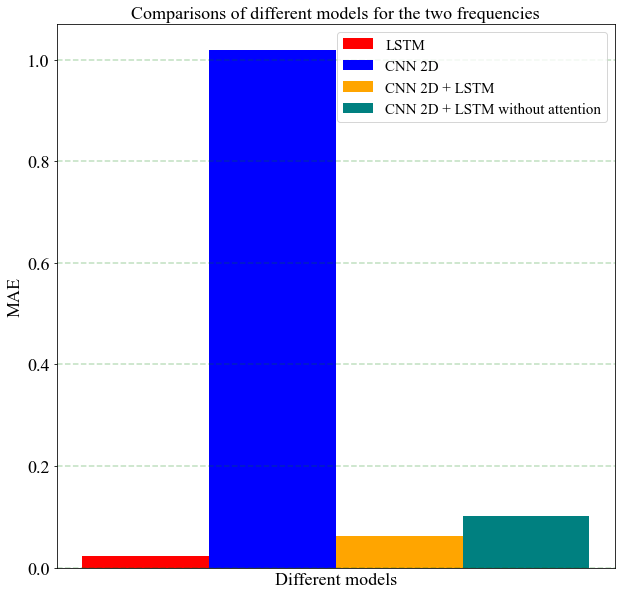

In [7]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,10))

x = np.arange(1)
width = 0.2

plt.bar(x-0.3,lstm_err, width, color = 'red')
plt.bar(x-0.1,cnn_err, width, color = 'blue')
plt.bar(x+0.1,cnn_lstm_err, width, color = 'orange')
plt.bar(x+0.3,cnn_lstm_withoutAttention_err, width, color = 'teal')
plt.xticks([])
plt.xlabel('Different models', fontsize = 18)
plt.ylabel("MAE", fontsize = 18)
plt.title('Comparisons of different models for the two frequencies', fontsize = 18)
plt.legend(["LSTM",  "CNN 2D", "CNN 2D + LSTM", "CNN 2D + LSTM without attention"], loc='best', fontsize = 15)
plt.grid(color = 'green', linestyle = '--', linewidth = 1.5, alpha=0.25)
plt.savefig("Comparisons of two frequency errors.png", dpi = 600)
plt.show()

In [8]:
val1 = Test_Matrix_Features
val_plot = np.concatenate((val1,values))

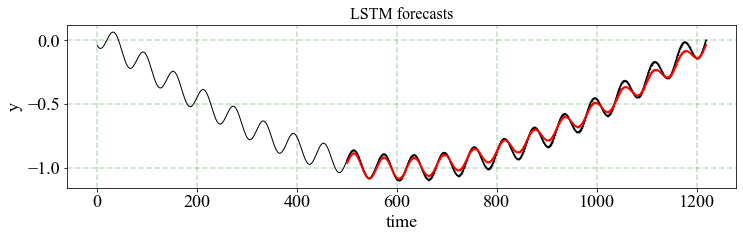

In [9]:
# Specify figure size
fig = plt.figure(figsize=(12,3))
plt.rcParams.update({'font.size': 18})

x1 = np.arange(0,input_len)
x2 = np.arange(input_len,len(val_plot))

plt.plot(x1,val1,'k',linewidth=1)
plt.plot(x2,values,marker = '.',color='black',markersize=1)
plt.plot(x2,lstm_preds,marker = '.',color='red',markersize=1)

plt.title('LSTM forecasts', fontsize=16)
plt.xlabel("time", fontsize=18)
plt.ylabel("y", fontsize=18)

plt.grid(color = 'green', linestyle = '--', linewidth = 1.5, alpha=0.25)
plt.savefig("Comparisons of more frequency with noise results_lstm.png", dpi = 600)
plt.show()

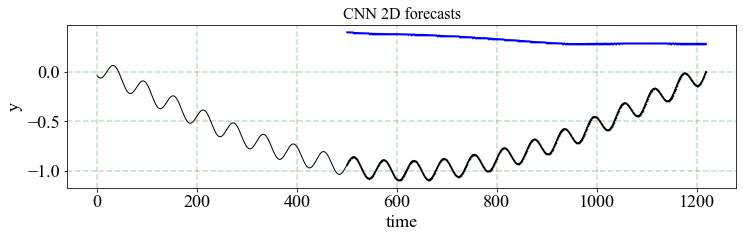

In [10]:
# Specify figure size
fig = plt.figure(figsize=(12,3))
plt.rcParams.update({'font.size': 18})

x1 = np.arange(0,input_len)
x2 = np.arange(input_len,len(val_plot))

plt.plot(x1,val1,'k',linewidth=1)
plt.plot(x2,values,marker = '.',color='black',markersize=1)
plt.plot(x2,cnn_preds,marker = '.',color='blue',markersize=1)

plt.title('CNN 2D forecasts', fontsize=16)
plt.xlabel("time", fontsize=18)
plt.ylabel("y", fontsize=18)

plt.grid(color = 'green', linestyle = '--', linewidth = 1.5, alpha=0.25)
plt.savefig("Comparisons of more frequency with noise results_cnn2d.png", dpi = 600)
plt.show()

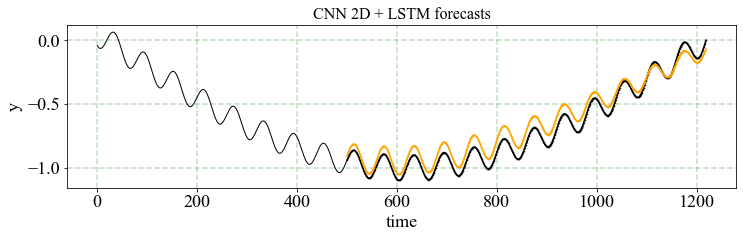

In [11]:
# Specify figure size
fig = plt.figure(figsize=(12,3))
plt.rcParams.update({'font.size': 18})

x1 = np.arange(0,input_len)
x2 = np.arange(input_len,len(val_plot))

plt.plot(x1,val1,'k',linewidth=1)
plt.plot(x2,values,marker = '.',color='black',markersize=1)
plt.plot(x2,cnn_lstm_withAttention_preds,marker = '.',color='orange',markersize=1)

plt.title('CNN 2D + LSTM forecasts', fontsize=16)
plt.xlabel("time", fontsize=18)
plt.ylabel("y", fontsize=18)

plt.grid(color = 'green', linestyle = '--', linewidth = 1.5, alpha=0.25)
plt.savefig("Comparisons of more frequency with noise results_cnn_lstm.png", dpi = 600)
plt.show()

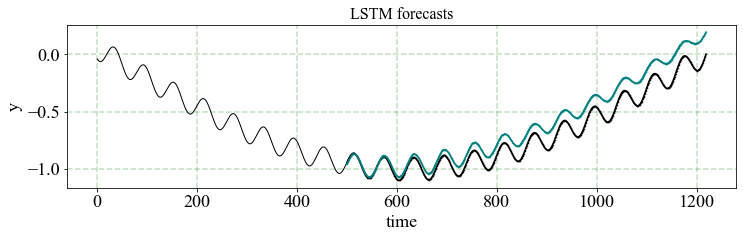

In [12]:
# Specify figure size
fig = plt.figure(figsize=(12,3))
plt.rcParams.update({'font.size': 18})

x1 = np.arange(0,input_len)
x2 = np.arange(input_len,len(val_plot))

plt.plot(x1,val1,'k',linewidth=1)
plt.plot(x2,values,marker = '.',color='black',markersize=1)
plt.plot(x2,cnn_lstm_withoutAttention_preds,marker = '.',color='teal',markersize=1)

plt.title('LSTM forecasts', fontsize=16)
plt.xlabel("time", fontsize=18)
plt.ylabel("y", fontsize=18)

plt.grid(color = 'green', linestyle = '--', linewidth = 1.5, alpha=0.25)
plt.savefig("Comparisons of more frequency with noise results_cnn_lstm_withoutAttention.png", dpi = 600)
plt.show()